# Multi Layer Perceptron Algorithm

## *Import required libraries*

In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Step 1 - Dataset Selection

In [2]:
df = pd.read_csv('breast_cancer_data.csv') 
df.head()

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(df.shape)
df.describe().transpose()

(569, 32)


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_1ean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_1ean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
peri1eter_1ean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_1ean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
s1oothness_1ean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
co1pactness_1ean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_1ean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_1ean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


## Step 2 - Data Normlization 

In [4]:
target_column = ['diagnosis'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,0.033327,0.137186,0.000010,0.000954,0.000994,0.009671,1.0
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.0
radius_1ean,569.0,0.502572,0.125366,0.248346,0.416222,0.475631,0.561366,1.0
texture_1ean,569.0,0.491081,0.109497,0.247200,0.411660,0.479633,0.554990,1.0
peri1eter_1ean,569.0,0.487899,0.128907,0.232308,0.398780,0.457507,0.552255,1.0
area_1ean,569.0,0.261851,0.140709,0.057377,0.168053,0.220352,0.312955,1.0
s1oothness_1ean,569.0,0.589720,0.086072,0.322093,0.528580,0.586720,0.644431,1.0
co1pactness_1ean,569.0,0.302087,0.152903,0.056109,0.187956,0.268182,0.377533,1.0
concavity_1ean,569.0,0.208058,0.186785,0.000000,0.069260,0.144189,0.306232,1.0
concave points_1ean,569.0,0.243137,0.192857,0.000000,0.100944,0.166501,0.367793,1.0


## Step 3 - Train and Test Split

In [5]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape);
print(X_test.shape)

(398, 31)
(171, 31)


## Step 4 - Algorithem Selection (MLP)

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(11,11,11),learning_rate='invscaling', learning_rate_init=0.05,momentum=0.9, activation='logistic', solver='adam', max_iter=200)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29c30766d48>)

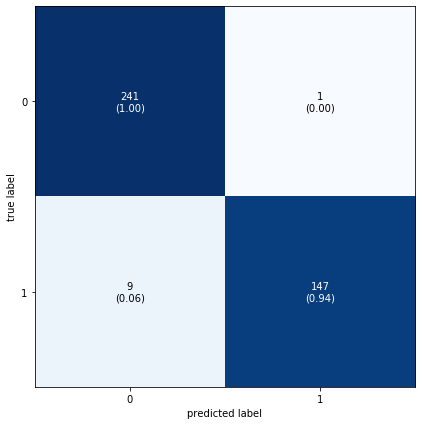

In [7]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(conf_mat=mat,show_normed=True, figsize=(7,7))

## Step 5 - Model Evalution (Training)

Confustion Matrix For Training Data
-------------------------------------
[[241   1]
 [  9 147]]
-------------------------------------
Accuracy: 0.9748743718592965
Sensitivity/Recall: 0.9423076923076923
Specificity: 0.9958677685950413
Precision: 0.9932432432432432
F-Score: 0.9671052631578947
Mens Squre Error: 0.017543859649122806
Root Mens Squre Error: 0.13245323570650439
ROC_AUC scores: 0.9690877304513668


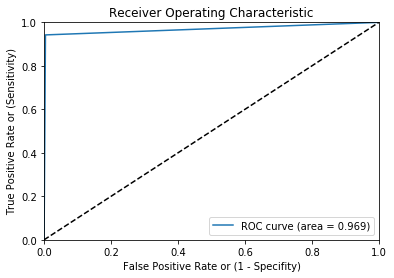

In [8]:
print("Confustion Matrix For Training Data")
print("-------------------------------------")
print(confusion_matrix(y_train,predict_train))
print("-------------------------------------")
print("Accuracy:", accuracy_score(y_train,predict_train))
print("Sensitivity/Recall:",metrics.recall_score(y_train,predict_train))
tn, fp, fn, tp = confusion_matrix(y_train,predict_train).ravel()
specificity = tn / (tn+fp)
print("Specificity:", specificity)
print("Precision:", metrics.precision_score(y_train,predict_train))
print("F-Score:", metrics.f1_score(y_train,predict_train))
print("Mens Squre Error:", mean_squared_error(y_test,predict_test))
print("Root Mens Squre Error:", np.sqrt(mean_squared_error(y_test,predict_test)))
print("ROC_AUC scores:",metrics.roc_auc_score(y_train,predict_train, average="macro"))

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_train,predict_train)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29c32979308>)

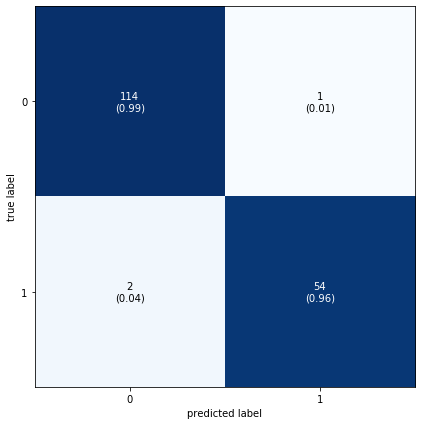

In [9]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(conf_mat=mat,show_normed=True, figsize=(7,7))

## Step 5 - Model Evalution (Testing)

Confustion Matrix For Testing Data
-------------------------------------
[[114   1]
 [  2  54]]
-------------------------------------
Accuracy: 0.9824561403508771
Sensitivity/Recall: 0.9642857142857143
Specificity: 0.991304347826087
Precision: 0.9818181818181818
F-Score: 0.972972972972973
Mens Squre Error: 0.017543859649122806
Root Mens Squre Error: 0.13245323570650439
ROC_AUC scores: 0.9777950310559007


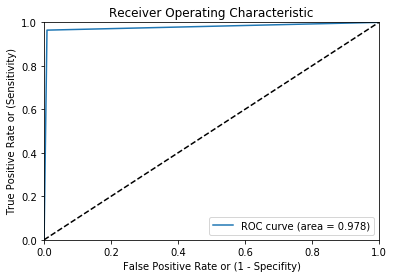

In [10]:
print("Confustion Matrix For Testing Data")
print("-------------------------------------")
print(confusion_matrix(y_test,predict_test))
print("-------------------------------------")
print("Accuracy:", accuracy_score(y_test,predict_test))
print("Sensitivity/Recall:",metrics.recall_score(y_test,predict_test))
tn, fp, fn, tp = confusion_matrix(y_test,predict_test).ravel()
specificity = tn / (tn+fp)
print("Specificity:", specificity)
print("Precision:", metrics.precision_score(y_test,predict_test))
print("F-Score:", metrics.f1_score(y_test,predict_test))
print("Mens Squre Error:", mean_squared_error(y_test,predict_test))
print("Root Mens Squre Error:", np.sqrt(mean_squared_error(y_test,predict_test)))
print("ROC_AUC scores:",metrics.roc_auc_score(y_test,predict_test, average="macro"))

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test,predict_test)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")